Author: Alastair


# 3. Reading and writing files

### Goals

- reading the atom coordinates from a PDB file
- output value tables to a text file
- learning to do calculations with *numpy arrays*
- first plotting with *matplitlib*

In [ ]:
### Introduction

#### ATOM data in PDB files

The PDB file format contains information about atom species and positions. This information is found in lines starting with ``ATOM``. Each of these lines has the same amount of characters and has the following format:

| Characters | Type                                  | Data type        |       
|------------|---------------------------------------|------------------|
| 1 - 6      | Record name «ATOM»                    | String           |
| 7-11       | Serial atom number                    | Integer          |
| 13-16      | Atom name                             | String           |
| 17         | Alternate location                    | String           |
| 18-20      | Residue name                          | String           |
| 22         | Chain identifier                      | String           |
| 23-26      | Residue sequence nb.                  | Integer          |
| 27         | Code for residues insertion           | String           |
| 31-38      | X coordinate in Å                     | Float            |
| 39-46      | Y coordinate in Å                     | Float            |
| 47-54      | Z coordinate in Å                     | Float            |
| 55-60      | Occupancy                             | Float            |
| 61-66      | Temperature factor                    | Float            |
| 77-78      | Element symbol                        | String           |
| 79-80      | Charge                                | String           |

Further reading: http://www.wwpdb.org/documentation/file-format-content/format33/v3.3.html

**Note:** With PDB files, splitting the lines in their individual columns using the function ``line.split()`` is dangerous: use character positions instead!

### *TASK 1*

In this folder you will find the PDB file for Proaerolysin (``1PRE.pdb``). Open the file, and print all the lines containing a cysteine (residue name "CYS"). 

**Note:** Remember that in *Python* one starts counting from 0, not 1!

In [64]:
# TYPE YOUR SOLUTION HERE

with open ('1PRE.pdb', 'r') as file_handle:
    data = file_handle.readlines() 
    
 
for line in data:
        
    if line.startswith("ATOM"):
        if 'CYS' == line[17:20]:
            print(line)
    


ATOM    136  N   CYS A  19      13.459  82.830  23.230  1.00 33.86           N  

ATOM    137  CA  CYS A  19      12.542  81.712  23.122  1.00 33.54           C  

ATOM    138  C   CYS A  19      11.546  81.890  21.995  1.00 34.09           C  

ATOM    139  O   CYS A  19      11.397  82.988  21.465  1.00 34.19           O  

ATOM    140  CB  CYS A  19      11.740  81.685  24.443  1.00 32.44           C  

ATOM    141  SG  CYS A  19      12.815  81.107  25.800  1.00 31.70           S  

ATOM    561  N   CYS A  75      13.304  76.650  26.884  1.00 28.69           N  

ATOM    562  CA  CYS A  75      12.218  77.532  27.304  1.00 30.01           C  

ATOM    563  C   CYS A  75      11.060  76.742  27.879  1.00 30.85           C  

ATOM    564  O   CYS A  75      11.022  75.512  27.695  1.00 31.27           O  

ATOM    565  CB  CYS A  75      11.760  78.281  26.056  1.00 30.28           C  

ATOM    566  SG  CYS A  75      13.153  79.155  25.299  1.00 30.92           S  

ATOM   1211  N  

### *TASK 2*

Parse ``1PRE.pdb`` and write the $x$, $y$ and $z$ coordinates of all the cysteines to the output file ``atoms_cys.txt``. Use [*f-strings*](https://www.blog.pythonlibrary.org/2018/03/13/python-3-an-intro-to-f-strings/) to generate one string for each line ending with a newline character ``\n``.

**Advanced:** Make sure that columns are aligned.

In [65]:
# TYPE YOUR SOLUTION HERE

with open ('atoms_cys.txt', 'w') as atoms: 
    
    
    with open ('1PRE.pdb', 'r') as file_handle:
        data = file_handle.readlines() 
    
       
    for line in data:
        
        if line.startswith("ATOM"):
            if 'CYS' == line[17:20]:
                
                
                atoms.writelines(f"({line[30:38]},{line[38:46]},{line[46:54]}) \n")   
            
            

### *TASK 3*

Define a function ``read_pdb(filename)`` that expects as input parameter a PDB filename and that returns four *numpy arrays* containing
- the $x$ coordinates
- the $y$ coordinates
- the $z$ coordinates
- the atomic numbers (proton numbers)

**Advanced:** Save the function in another file called ``pdb_``*yourname*``.py``, import and call it.

In [69]:

import numpy as np

def read_pdb(filename):
     if filename.endswith(".pdb"):
        with open(filename,'r') as file_handle:
            data = file_handle.readlines()
            for line in data:
                if line.startswith("ATOM"):
                    
                    x = float(line[30:38])
                    y = float(line[38:46])
                    z = float(line[46:54])
                    atom = line[76:78]
                    
                    if atom == "H":
                        atom = 1
                    if atom == "C":
                        atom = 6
                    if atom == "N":
                        atom = 7
                    if atom == "O":
                        atom = 8
                    if atom == "S":
                        atom = 16
                    print(f"{np.array([x, y, z, atom])}")

In [67]:
# TYPE YOUR SOLUTION HERE

import pdb_alastair

read_pdb('1PRE.pdb')

['5.955' '77.192' '41.9' ' N']
['5.061' '76.43' '40.975' ' C']
['5.843' '75.299' '40.293' ' C']
['7.062' '75.489' '40.068' ' O']
['4.405' '77.378' '39.971' ' C']
['3.572' '78.477' '40.6' ' C']
['4.276' '79.825' '40.67' ' C']
['5.057' '80.088' '41.613' ' O']
['4.017' '80.669' '39.761' ' O']
['5.159' '74.174' '40.008' ' N']
['5.766' '73.007' '39.378' ' C']
['6.196' '73.159' '37.927' ' C']
['5.432' '73.752' '37.156' ' O']
['4.727' '71.885' '39.479' ' C']
['3.619' '72.468' '40.29' ' C']
['3.722' '73.967' '40.321' ' C']
['7.389' '72.692' '37.542' ' N']
['7.857' '72.786' '36.159' ' C']
['7.558' '71.409' '35.549' ' C']
['7.869' '70.408' '36.244' ' O']
['9.346' '73.071' '35.972' ' C']
['9.757' '73.005' '34.52' ' C']
['9.696' '74.481' '36.366' ' C']
['6.992' '71.318' '34.349' ' N']
['6.736' '69.993' '33.805' ' C']
['7.659' '69.738' '32.641' ' C']
['7.446' '70.403' '31.625' ' O']
['5.308' '69.932' '33.274' ' C']
['4.287' '69.96' '34.398' ' C']
['4.489' '69.175' '35.512' ' C']
['3.156' '70.745' '

### *TASK 4*

Use the *matplotlib* function [*matplotlib.pyplot.scatter* ](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to visualise the $x$ and $y$ coordinates of Proaerolysin.

**Advanced:** Plot each element in a different color.

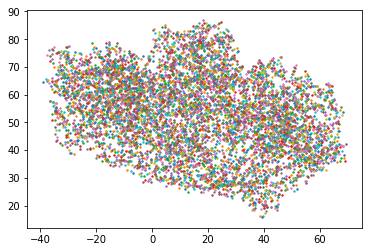

In [48]:
# Magic import of the matplotlib package for activating plotting in the notebook
import matplotlib
%matplotlib inline
import numpy

filename='1PRE.pdb'

with open (filename, 'r') as file_handle:
    data = file_handle.readlines()
    for line in data:
        if line.startswith("ATOM"):
            x = float(line[30:38])
            y = float(line[38:46])
            z = float(line[46:54])
            atom = line[76:78]
                   
            if atom == "H":
                atom = 'firebrick'
            if atom == "C":
                atom = 'navy'
            if atom == "N":
                atom = 'magenta'
            if atom == "O":
                atom = 'goldenrod'
            if atom == "S":
                atom = 'lime'
                    
               
            arrays=(x, y, z, atom)
            matplotlib.pyplot.scatter(arrays[0], arrays[1], s = 2)  
            

In [24]:
# TYPE YOUR SOLUTION HERE

### *EXTRA TASK*

The radius of gyration of a molecule of $N$ atoms is defined as
    
$$R_g = \sqrt{\frac{\sum_i^N m_i r_i^2}{\sum_i^N m_i}}$$

where $m_i$ is mass of atom $i$ and $r_i$ is the distance of atom $i$ from the molecule's center of mass

$$\vec{r_0} = \frac{\sum_i^N m_i \vec{r_i}}{\sum_i^N m_i}$$

Estimate the size of Proaerolysin by calculating the radius of gyration on the basis of only its carbon atoms.

**Advanced:** Consider atoms of all elements for this calculation.

In [25]:
# TYPE YOUR SOLUTION HERE